In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Reading the data
dataset = pd.read_csv("Dataset/maxwell.arff.csv")
dataset.head()




,SizeFP,Nlan,T01,T02,T03,T04,T05,T06,T07,T08,T09,T10,T11,T12,T13,T14,T15,Effort
0,647,3,4,3,5,3,3,3,4,5,4,5,4,4,4,4,5,7871
1,130,3,2,3,3,3,3,3,2,2,4,3,4,4,4,4,4,845
2,254,2,3,3,2,3,3,4,2,3,4,5,4,3,2,3,3,2330
3,1056,3,2,2,4,2,2,1,3,5,4,4,5,4,3,2,3,21272
4,383,2,3,3,3,4,3,3,4,3,4,4,3,4,5,4,4,4224


In [3]:

dataset = pd.read_csv("Dataset/maxwell.arff.csv")



x = np.array(dataset.drop(['Effort'],axis=1))
y = np.array(dataset['Effort'])

Reading the data

In [4]:

x=np.array(dataset.drop(['Effort'], axis=1))

y=np.array(dataset['Effort'])


Scaling the data

In [5]:
scaler=MinMaxScaler(feature_range=(0,1))
x_scaled=scaler.fit_transform(x)
y=np.reshape(y,(62,1))
y=scaler.fit_transform(y)

 Splitting the dataset into training and testing set (80/20)

In [6]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state =30)

In [7]:
x_train

array([[0.10625869, 0.33333333, 0.        , 0.5       , 0.33333333,
        0.33333333, 0.5       , 0.33333333, 0.75      , 1.        ,
        0.33333333, 0.        , 0.33333333, 0.33333333, 0.5       ,
        0.75      , 0.5       ],
       [0.31265647, 0.66666667, 0.75      , 0.25      , 0.        ,
        0.33333333, 0.75      , 1.        , 0.75      , 0.        ,
        0.66666667, 0.        , 0.66666667, 0.33333333, 0.75      ,
        0.5       , 0.75      ],
       [0.09318498, 0.33333333, 0.5       , 0.5       , 0.33333333,
        0.66666667, 0.5       , 0.66666667, 0.75      , 0.33333333,
        0.66666667, 0.66666667, 0.33333333, 0.66666667, 1.        ,
        0.75      , 0.75      ],
       [0.80834492, 1.        , 0.75      , 0.75      , 0.        ,
        0.33333333, 0.5       , 0.66666667, 0.75      , 0.33333333,
        0.66666667, 0.66666667, 1.        , 0.33333333, 0.25      ,
        0.5       , 0.5       ],
       [0.12823366, 0.        , 0.25      , 0.5     

 SVM Model

In [8]:
# SVM Model
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
# Train the model 
svr.fit(x_train, y_train.ravel())

SVR(C=1000.0, gamma=0.1)

Predicting the Close Price

In [9]:
# Predicting the target values of the test set
y_pred = svr.predict(x_test)

In [10]:
y_pred=np.reshape(y_pred,(13,1))
y_test=np.reshape(y_test,(13,1))

Finding the RMSE and MAPE

Definition of Mean Absolute Percentage Error

In [11]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [12]:

def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )
# RMSE (Root Mean Square Error)
mse=mean_squared_error(y_test, y_pred)
print("\nMSE:\n",mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRMSE:\n",rmse)
mape=mape(y_test, y_pred)
print("\nMAPE:\n",mape)

smape = calculate_smape(y_test, y_pred)
print("\nSMAPE:\n",smape)
r2_score=1 - (1-svr.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print("\n Adj R2 score:\n",r2_score)


MSE:
 0.0037270568990080506

RMSE:
 0.0610496265263601

MAPE:
 259.76565740054605

SMAPE:
 105.28

 Adj R2 score:
 0.7363950723380626


In [13]:

y_pred=scaler.inverse_transform(y_pred)

In [14]:


y_test=scaler.inverse_transform(y_test)

In [15]:

y_test=np.reshape(y_test,(13,))
y_pred=np.reshape(y_pred,(13,))

In [16]:
dfr=pd.DataFrame({'Actual Effort':y_test, 'Predicted Effort':y_pred})
print(dfr)

    Actual Effort  Predicted Effort
0          4150.0       6193.949944
1         10000.0      11175.148727
2          5100.0       2085.659451
3           963.0       5325.572263
4          4456.0      -1589.086814
5          9369.0       7525.786085
6          3440.0      -2277.275855
7          5279.0       1918.513191
8          7184.0      11584.649446
9          1100.0      -1817.975047
10         7451.0       5347.258947
11         1233.0      -5027.080446
12        11039.0       9066.450437


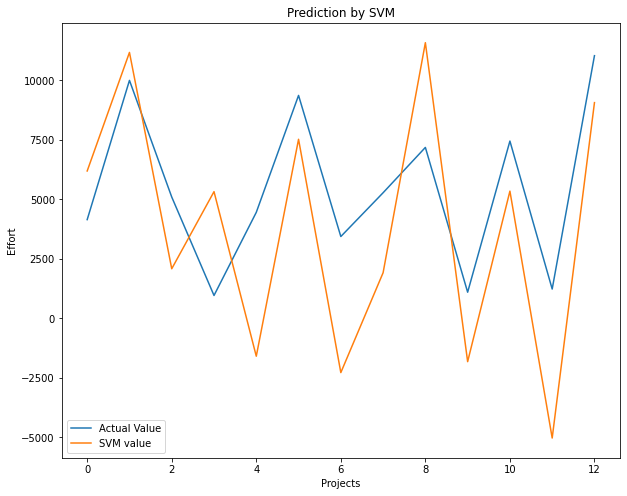

In [17]:
#Predicted vs Actual Close Value 
from matplotlib import pyplot as plt 
plt.figure(figsize=(10,8))
plt.plot(y_test, label="Actual Value")
plt.plot(y_pred, label="SVM value")
plt.title("Prediction by SVM")
plt.xlabel("Projects")
plt.ylabel("Effort")
plt.legend()
plt.show()